#  Practice 2 : Fraud 
Authors:
- Martín Hijar Jiménez
- Eduardo Salgado Díaz del Río

5 December 2022

Subject: Machine Learning - Master's Degree in Data Science 

### Project goal

Our objective is to model the data previously studied in 00_EDA.ipynb, and obtain the probabilities of fraud in each of the transactions.

### Phases of the project

- It is a dataset to train and validate prediction models using Machine learning, although in the first phase of the project, we will perform an EDA analysis.
- In the second phase, we will do a data processing, that is to say, we will eliminate, modify different columns to be able to continue with the different phases of the project.
- To continue with the different phases of the project, we study the results obtained with different machine learning models in order to find the best models.
- In this last phase, we will select the two best models obtained in the previous phase, to continue with a more exhaustive study.

### Dataset

The data is divided into the data set fraud, the dataset consists of a number of different transactions that have been performed in different categories. The data set can be divided in different parts, in numerical and categorical categories, for further analysis we can say that the target variable is the variable 'isFraud'.

Firstly, we create a dictionary to pre-analyse the different variables, for the use of the dataset, creating different subgroups within the analysis set such as number, name, description, type and category.

In this notebook a first scan of the data set is performed, the pertinent modifications are made to the data and the new data set is saved with the modifications made.

### Import de dictionary

<img src='../images/Diccionario.png'>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
from aux_func import *

### Read data

In [3]:
file = '../data/raw/Original_dataset_payments_fraud.csv'

In [4]:
df = pd.read_csv(file, sep=';')

### Quick overview of the data

In [5]:
print(f'Dimensions of the Data Frame: {df.shape}')
df.head()

Dimensions of the Data Frame: (1048575, 19)


,step,type,amount,gender,device,connection_time,nameOrig,race,oldbalanceOrg,age,newbalanceOrig,zone,user_number,nameDest,user_connections,security_alert,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,man,mac,"0,140039412",C1231006815,black,170136.0,85,160296.36,capital,138,M1979787155,5,1,0.0,0.0,0
1,1,PAYMENT,1864.28,woman,mac,"0,496889534",C1666544295,asian,21249.0,57,19384.72,country,909,M2044282225,1,0,0.0,0.0,0
2,1,TRANSFER,181.00,man,pc,"0,781150327",C1305486145,asian,181.0,66,0.00,capital,2569,C553264065,10,0,0.0,0.0,1
3,1,CASH_OUT,181.00,man,mac,"0,565068378",C840083671,black,181.0,31,0.00,country,1787,C38997010,3,0,21182.0,0.0,1
4,1,PAYMENT,11668.14,unknow,mac,"0,517114493",C2048537720,black,41554.0,90,29885.86,country,3997,M1230701703,8,0,0.0,0.0,0


Each row represents one transaction. There are 1 048 575 transactions and each transaction has 19 attributes.

#### We study the Data Frame column types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   step              1048575 non-null  int64  
 1   type              1048575 non-null  object 
 2   amount            1048575 non-null  float64
 3   gender            943457 non-null   object 
 4   device            943995 non-null   object 
 5   connection_time   1048575 non-null  object 
 6   nameOrig          1048575 non-null  object 
 7   race              943412 non-null   object 
 8   oldbalanceOrg     1048575 non-null  float64
 9   age               1048575 non-null  int64  
 10  newbalanceOrig    1048575 non-null  float64
 11  zone              944161 non-null   object 
 12  user_number       1048575 non-null  int64  
 13  nameDest          1048575 non-null  object 
 14  user_connections  1048575 non-null  int64  
 15  security_alert    1048575 non-null  int64  
 16  

We see that there are columns with null data in the zone and device columns. We count how many there are in each of these variables.

In [7]:
pd.isnull(df[[x for x in df.columns[pd.isna(df).any()].tolist()]]).sum()

gender    105118
device    104580
race      105163
zone      104414
dtype: int64

Let's see what variables these columns have

In [8]:
df['device'].unique()

array(['mac', 'pc', 'iphone', nan], dtype=object)

In [9]:
df['zone'].unique()

array(['capital', 'country', 'africa', nan], dtype=object)

In [10]:
pd.isnull(df[[x for x in df.columns[pd.isna(df).any()].tolist()]]).sum()

gender    105118
device    104580
race      105163
zone      104414
dtype: int64

We check for duplicates

In [11]:
#we look at duplicates
print(df.shape, df.drop_duplicates().shape)

(1048575, 19) (1048575, 19)


We see that there are no duplicates.

### Study of the target variable 'isFraud'.

In [12]:
percent_distribution_target = df['isFraud'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
count_target = df['isFraud'].value_counts().reset_index()

df_target_distribution = pd.merge(percent_distribution_target, count_target, on=['index'], how='inner').drop('index', axis=1)

print(f'Distribution of the target variable:')
df_target_distribution

Distribution of the target variable:


,Percent,isFraud
0,99.89109,1047433
1,0.10891,1142


We observe how the target variable isFraud is very unbalanced, only 0.10891 of the dataset are frauds, let's plot it to see the distribution graphically. 

#### Plot of target variable:

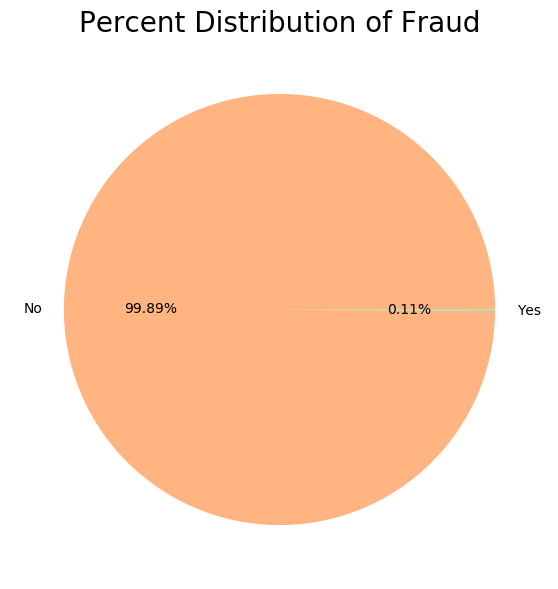

In [13]:
colors = sns.color_palette('pastel')[1:3]

fig, ax = plt.subplots(figsize=(7,7))
plt.pie(df_target_distribution['Percent'], labels = ['No', 'Yes'], colors = colors, autopct='%.2f%%')
plt.title('Percent Distribution of Fraud', fontsize = 20)
plt.show()

#### We study the proportions of the type of transactions


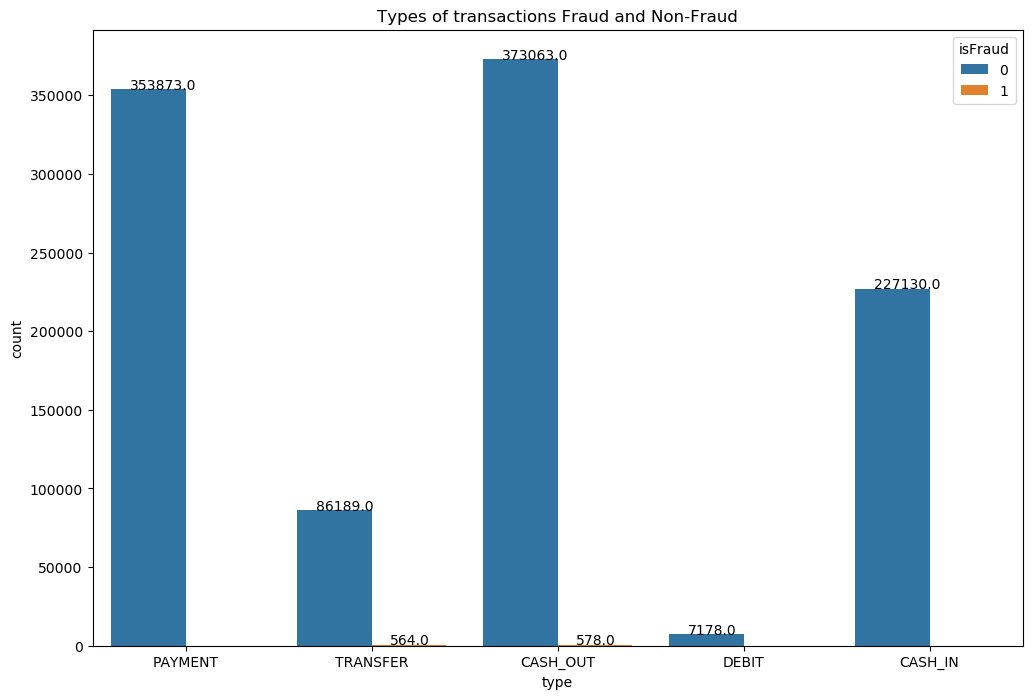

In [14]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of transactions Fraud and Non-Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

- We can see that only *TRANSFER* and *CASH OUT* have fraud.
- It should also be noted that *DEBIT* has much less data than the rest.
- It seems that the number of frauds of *TRANSFER* and *CASH OUT* is almost the same. We can conclude a priori that the modus operandi is to make a transfer and then withdraw the money in cash.

The *nameOrig* and *nameDest* columns look like the ID of each customer making or receiving transactions. Let's see if it has any relevance.

In [15]:
data1=df[(df['isFraud']==1) & (df['type']=='TRANSFER')]     
data1['nameDest'].value_counts()

C553264065     1
C1105243161    1
C29406343      1
C548676992     1
C506992553     1
              ..
C1466511502    1
C2145664965    1
C866867675     1
C399994587     1
C757947873     1
Name: nameDest, Length: 564, dtype: int64

In [16]:
data1=df[(df['isFraud']==1) & (df['type']=='CASH_OUT')]     
data1['nameOrig'].value_counts()

C840083671     1
C32861099      1
C1032527042    1
C1336358470    1
C1563094045    1
              ..
C1257352420    1
C1657291163    1
C1455982049    1
C1845753498    1
C409531429     1
Name: nameOrig, Length: 578, dtype: int64

There are no specific accounts where fraudulent transactions take place. We determined that these features are not useful.

Let's look at whether there is fraud in any particular device.

In [17]:
print("Successful transactions: \n",df[df["isFraud"] == 0].device.value_counts())
print("\n Fraudulent transactions: \n",df[df["isFraud"] == 1].device.value_counts())

Successful transactions: 
 mac       366677
pc        314528
iphone    261767
Name: device, dtype: int64

 Fraudulent transactions: 
 mac       389
pc        339
iphone    295
Name: device, dtype: int64


We can see that the proportions are quite similar and we cannot draw a priori conclusions from these data.

#### We are going to study the step variable.

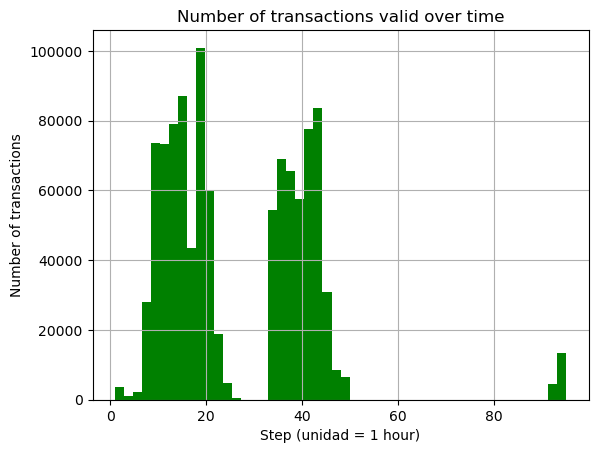

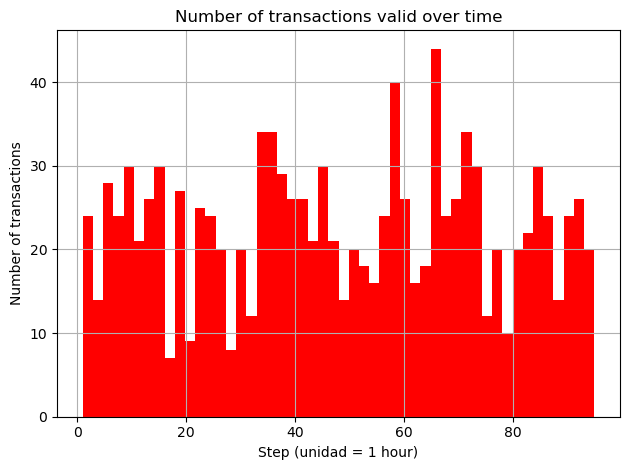

In [18]:
df[df["isFraud"] == 0].hist(column="step",color="green",bins=50)
plt.xlabel("Step (unidad = 1 hour)")
plt.ylabel("Number of transactions")
plt.title("Number of transactions valid over time")

df[df["isFraud"] == 1].hist(column ="step",color="red",bins=50)
plt.xlabel("Step (unidad = 1 hour)")
plt.ylabel("Number of transactions")
plt.title("Number of transactions valid over time")

plt.tight_layout()
plt.show()

We see that valid transactions occur around 15:00 and 40:00, while fraudulent transactions do not seem to change much over time. 
Let's study the distribution over the different days of the week.

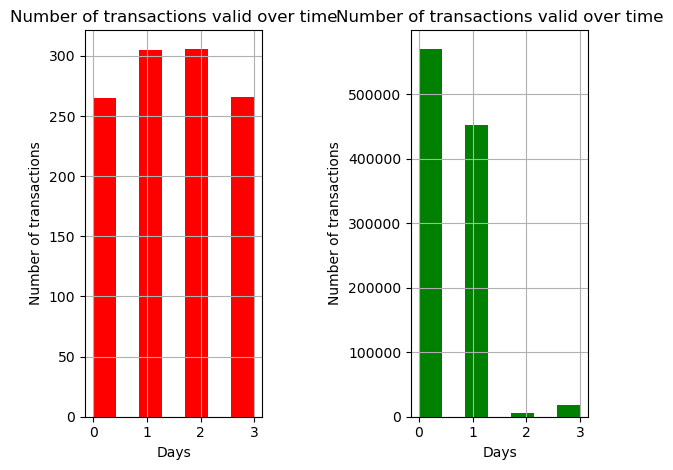

In [19]:
num_days = 7
num_hours = 24
fraud_days = (df[df["isFraud"] == 1].step//num_hours)% num_days
valid_days = (df[df["isFraud"] == 0].step//num_hours) % num_days

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.xlabel("Days")
plt.ylabel("Number of transactions")
plt.title("Number of transactions valid over time")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.xlabel("Days")
plt.ylabel("Number of transactions")
plt.title("Number of transactions valid over time")

plt.tight_layout()
plt.show()

We can clearly see that the vast majority of valid transactions occur on the first two days.

#### Let's look at the times of day where these transactions take place.

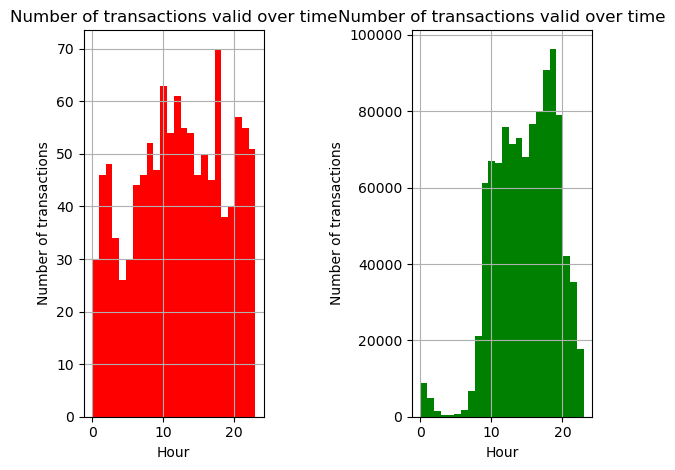

In [20]:
valid_hours = df[df["isFraud"] == 0].step % num_hours
fraud_hours = df[df["isFraud"] == 1].step % num_hours

plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.xlabel("Hour")
plt.ylabel("Number of transactions")
plt.title("Number of transactions valid over time")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.xlabel("Hour")
plt.ylabel("Number of transactions")
plt.title("Number of transactions valid over time")

plt.tight_layout()
plt.show()

Again we see a clear distribution where from 0 to 8 there are almost no valid transactions. Fraudulent transactions occur at almost any time.

#### Let's look at the connection_time variable

In [21]:
# We see how the column *Connection_time* is declared as an object because its decimals are separated by commas. 
# We transform the column to float type.
df['connection_time'] = df['connection_time'].apply(lambda x: x.replace(',', '.')).astype(float) 

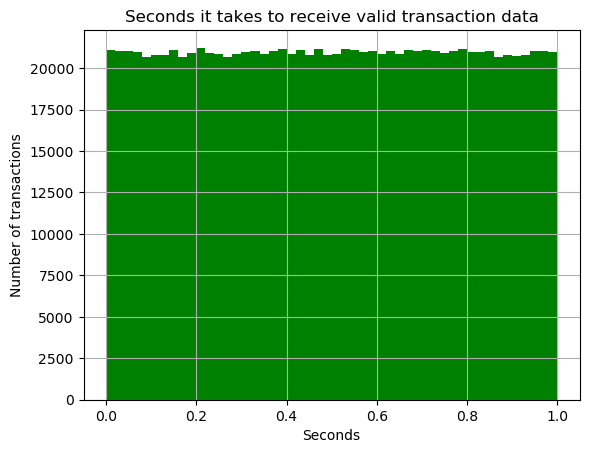

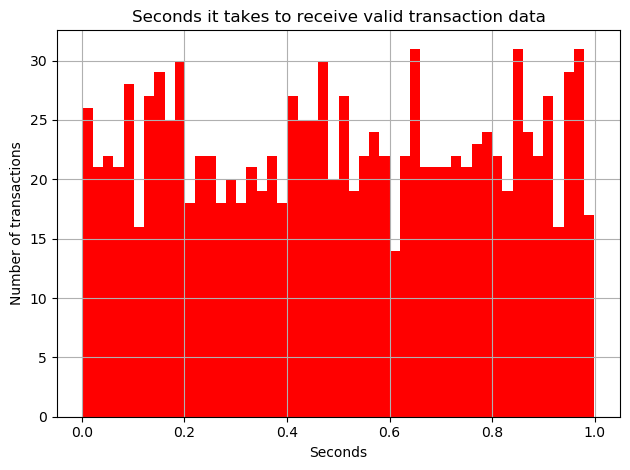

In [22]:
df[df["isFraud"] == 0].hist(column="connection_time",color="green",bins=50)
plt.xlabel("Seconds")
plt.ylabel("Number of transactions")
plt.title("Seconds it takes to receive valid transaction data")

df[df["isFraud"] == 1].hist(column ="connection_time",color="red",bins=50)
plt.xlabel("Seconds")
plt.ylabel("Number of transactions")
plt.title("Seconds it takes to receive valid transaction data")

plt.tight_layout()
plt.show()

There appears to be no pattern to differentiate between fraudulent and valid transactions.

#### We study the age distribution

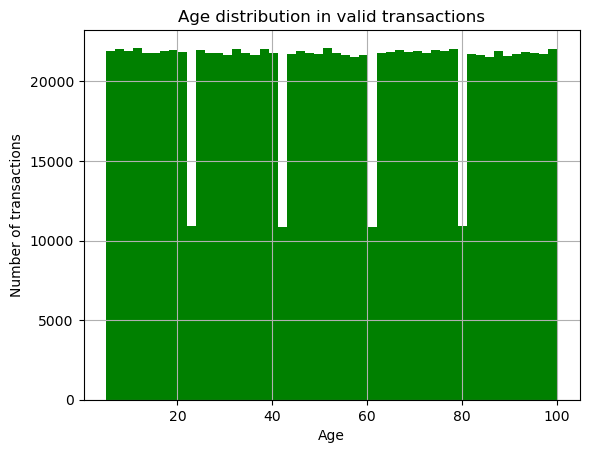

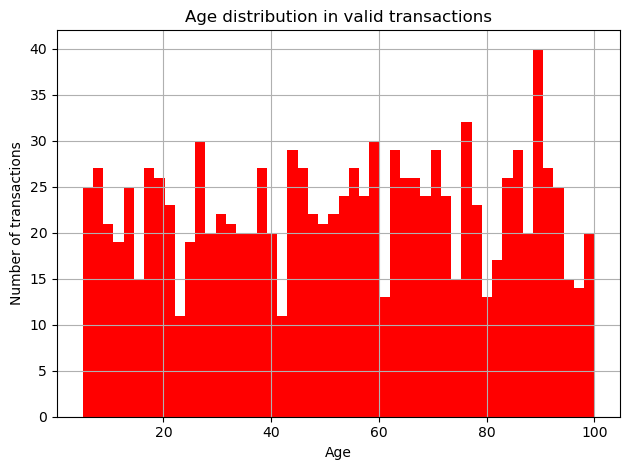

In [23]:
df[df["isFraud"] == 0].hist(column="age",color="green",bins=50)
plt.xlabel("Age")
plt.ylabel("Number of transactions")
plt.title("Age distribution in valid transactions")

df[df["isFraud"] == 1].hist(column ="age",color="red",bins=50)
plt.xlabel("Age")
plt.ylabel("Number of transactions")
plt.title("Age distribution in valid transactions")

plt.tight_layout()
plt.show()

There appears to be no pattern to differentiate between fraudulent and valid transactions.

#### We study the variable zone

In [24]:
print("Successful transactions: \n",df[df["isFraud"] == 0].zone.value_counts())
print("\n Fraudulent transactions: \n",df[df["isFraud"] == 1].zone.value_counts())

Successful transactions: 
 country    367617
africa     313670
capital    261845
Name: zone, dtype: int64

 Fraudulent transactions: 
 country    387
africa     356
capital    286
Name: zone, dtype: int64


There appears to be no pattern to differentiate between fraudulent and valid transactions.

#### We study the variable user_connections

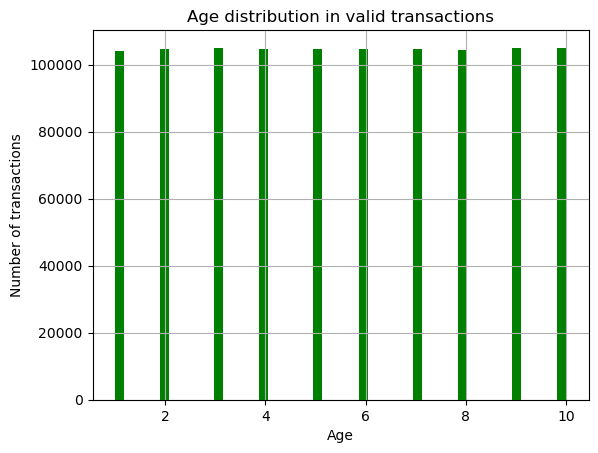

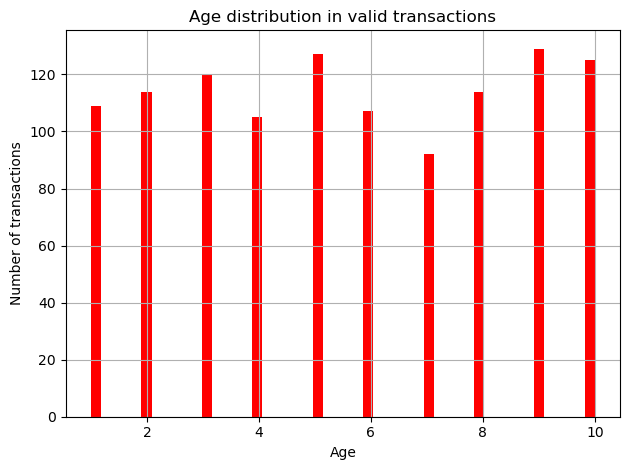

In [25]:
df[df["isFraud"] == 0].hist(column="user_connections",color="green",bins=50)
plt.xlabel("Age")
plt.ylabel("Number of transactions")
plt.title("Age distribution in valid transactions")

df[df["isFraud"] == 1].hist(column ="user_connections",color="red",bins=50)
plt.xlabel("Age")
plt.ylabel("Number of transactions")
plt.title("Age distribution in valid transactions")

plt.tight_layout()
plt.show()

There appears to be no pattern to differentiate between fraudulent and valid transactions.

#### Study of variable security_alert

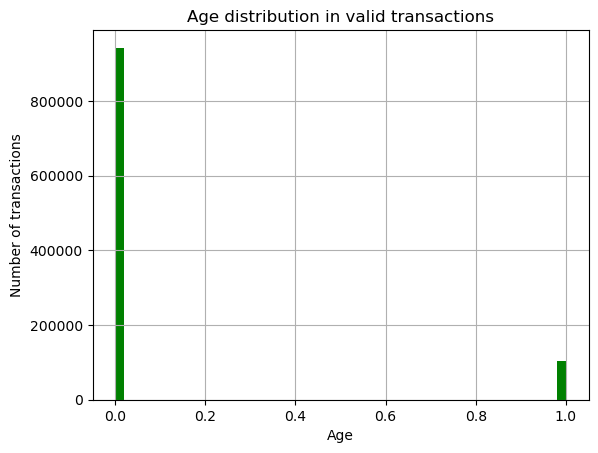

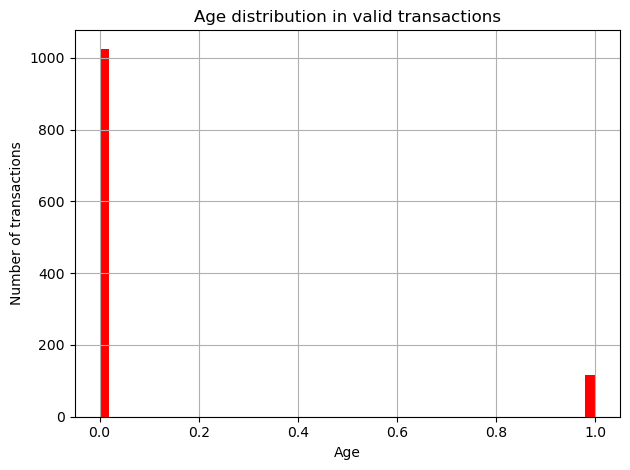

In [26]:
df[df["isFraud"] == 0].hist(column="security_alert",color="green",bins=50)
plt.xlabel("Age")
plt.ylabel("Number of transactions")
plt.title("Age distribution in valid transactions")

df[df["isFraud"] == 1].hist(column ="security_alert",color="red",bins=50)
plt.xlabel("Age")
plt.ylabel("Number of transactions")
plt.title("Age distribution in valid transactions")

plt.tight_layout()
plt.show()

Nor do we draw any conclusions.

We analyse the variables *amount*, *oldbalanceOrg* and *oldbalanceDest*.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

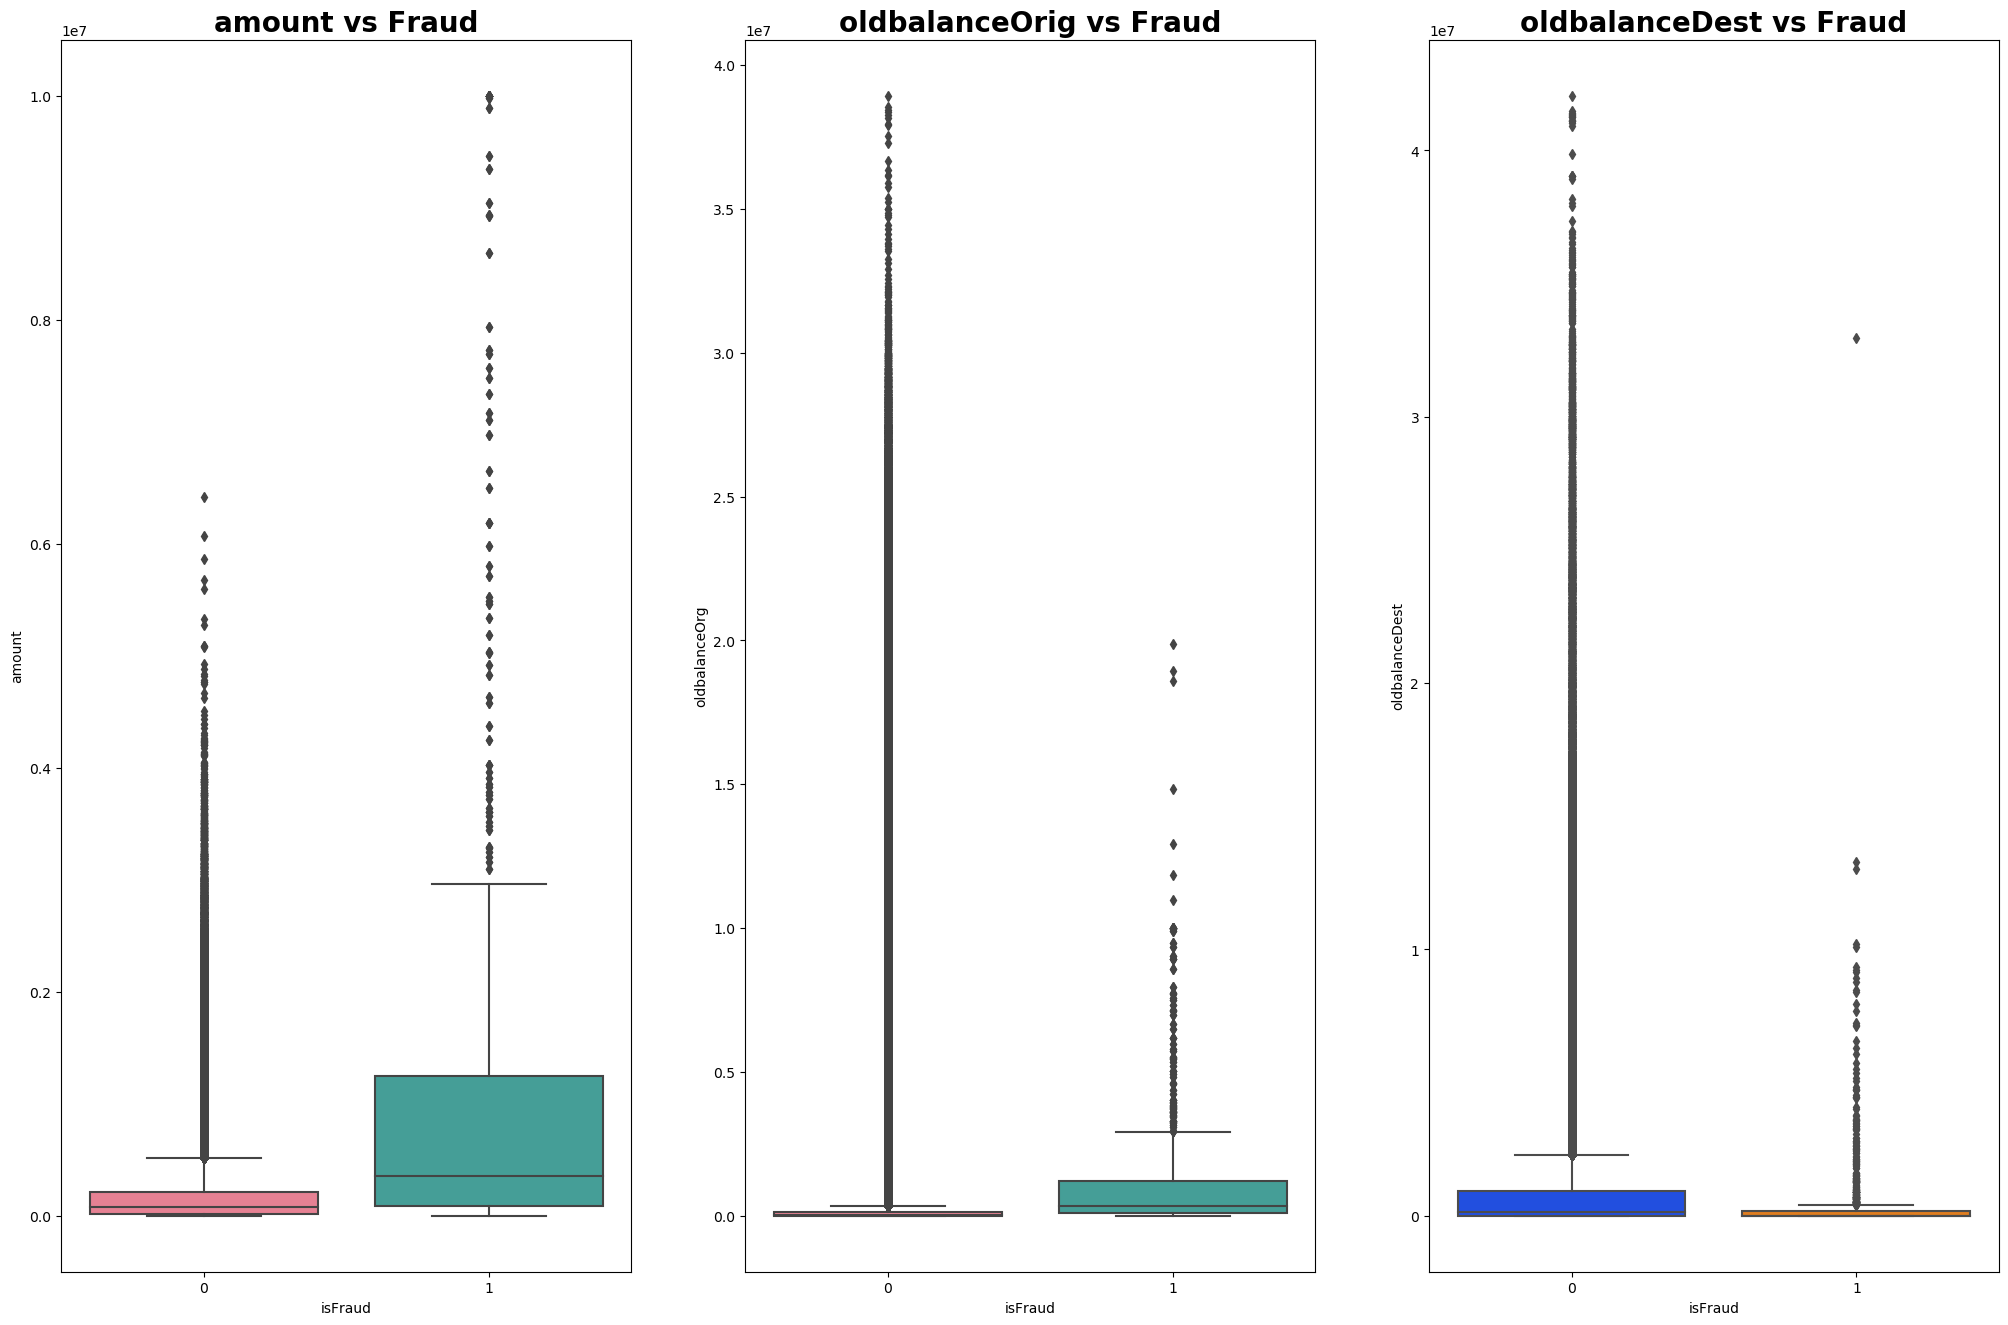

In [27]:
plt.figure(figsize=(25, 16))

plt.subplot(1,3,1)
sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)

plt.subplot(1,3,2)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)

plt.subplot(1,3,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = df,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

- It can be seen that the average amount of fraudulent transactions is higher.
- It can be seen how the balance of origin and destination before fraudulent transactions is higher than in valid (non-fraudulent) transactions.

Our Data Frame would look like this:

In [28]:
df.head()

,step,type,amount,gender,device,connection_time,nameOrig,race,oldbalanceOrg,age,newbalanceOrig,zone,user_number,nameDest,user_connections,security_alert,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,man,mac,0.140039,C1231006815,black,170136.0,85,160296.36,capital,138,M1979787155,5,1,0.0,0.0,0
1,1,PAYMENT,1864.28,woman,mac,0.496890,C1666544295,asian,21249.0,57,19384.72,country,909,M2044282225,1,0,0.0,0.0,0
2,1,TRANSFER,181.00,man,pc,0.781150,C1305486145,asian,181.0,66,0.00,capital,2569,C553264065,10,0,0.0,0.0,1
3,1,CASH_OUT,181.00,man,mac,0.565068,C840083671,black,181.0,31,0.00,country,1787,C38997010,3,0,21182.0,0.0,1
4,1,PAYMENT,11668.14,unknow,mac,0.517114,C2048537720,black,41554.0,90,29885.86,country,3997,M1230701703,8,0,0.0,0.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   step              1048575 non-null  int64  
 1   type              1048575 non-null  object 
 2   amount            1048575 non-null  float64
 3   gender            943457 non-null   object 
 4   device            943995 non-null   object 
 5   connection_time   1048575 non-null  float64
 6   nameOrig          1048575 non-null  object 
 7   race              943412 non-null   object 
 8   oldbalanceOrg     1048575 non-null  float64
 9   age               1048575 non-null  int64  
 10  newbalanceOrig    1048575 non-null  float64
 11  zone              944161 non-null   object 
 12  user_number       1048575 non-null  int64  
 13  nameDest          1048575 non-null  object 
 14  user_connections  1048575 non-null  int64  
 15  security_alert    1048575 non-null  int64  
 16  

### Study of numerical variables


In [30]:
# We define which numerical variables we are going to use.
numeric_columns = ['step', 'amount', 'connection_time','oldbalanceOrg','age',
             'newbalanceOrig','user_number','user_connections','oldbalanceDest','newbalanceDest']
df_num = df[numeric_columns]


In [31]:
# Search for outliers of the numerical variables
get_deviation_of_mean_perc(df, df_num, target='isFraud', multiplier=2)

,0.0,1.0,variable,sum_outlier_values,porcentaje_sum_null_values
0,0.974753,0.025247,step,18220,0.017376
1,0.986908,0.013092,amount,32081,0.030595
2,0.998938,0.001062,oldbalanceOrg,45203,0.043109
3,0.999934,0.000066,newbalanceOrig,45698,0.043581
4,0.999480,0.000520,oldbalanceDest,40402,0.038530
5,0.998491,0.001509,newbalanceDest,41751,0.039817


#### Correlations of numerical variables

The correlation matrix is constructed numerically and then graphically in order to see the possible correlations between the available variables.

In [32]:
# First, we construct the correlations numerically.
df_num.corr()

,step,amount,connection_time,oldbalanceOrg,age,newbalanceOrig,user_number,user_connections,oldbalanceDest,newbalanceDest
step,1.000000,-0.025996,0.001068,-0.006782,0.000201,-0.007182,-0.000356,-0.000140,-0.002251,-0.019502
amount,-0.025996,1.000000,0.001755,0.004864,0.000076,-0.001132,0.001476,0.000579,0.215562,0.311942
connection_time,0.001068,0.001755,1.000000,-0.001279,0.001739,-0.001342,-0.000450,0.000466,-0.000199,-0.000029
oldbalanceOrg,-0.006782,0.004864,-0.001279,1.000000,0.000155,0.999050,0.000379,-0.001799,0.093305,0.064050
age,0.000201,0.000076,0.001739,0.000155,1.000000,0.000119,0.001168,0.000634,0.000441,0.000377
newbalanceOrig,-0.007182,-0.001132,-0.001342,0.999050,0.000119,1.000000,0.000351,-0.001844,0.095179,0.063722
user_number,-0.000356,0.001476,-0.000450,0.000379,0.001168,0.000351,1.000000,-0.000554,-0.001038,-0.000588
user_connections,-0.000140,0.000579,0.000466,-0.001799,0.000634,-0.001844,-0.000554,1.000000,0.000902,0.001160
oldbalanceDest,-0.002251,0.215562,-0.000199,0.093305,0.000441,0.095179,-0.001038,0.000902,1.000000,0.978401
newbalanceDest,-0.019502,0.311942,-0.000029,0.064050,0.000377,0.063722,-0.000588,0.001160,0.978401,1.000000


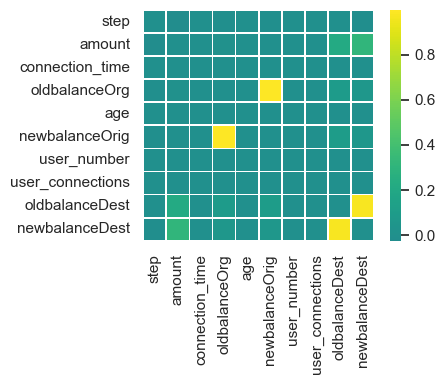

0

In [33]:
# Secondly, we plot the correlation matrix
get_corr_matrix(dataset = df_num, 
                metodo='pearson', size_figure=[4,3])

- We see how there are different variables with a strong direct correlation such as 'newbalanceDest' and 'oldbalanceDest'.


- Likewise, the columns 'newbalanceOrig' and 'oldbalanceOrig', also have a strong correlation between them.


- To a lesser extent, we can observe how the variable 'amount' has a not very striking correlation with the variables 'newbalanceDest' and 'oldbalanceDest'.

### Study of categorical variables

In [34]:
# We store in a data frame only the categorical variables.
categorical_columns = ['type', 'device', 'zone', 'race','gender','security_alert']
df_cat = df[categorical_columns]


In [35]:
# First, we construct the correlations categorical.

rows= []

for var1 in df_cat:
  col = []
  for var2 in df_cat :
    cramers =cramers_v(df_cat[var1], df_cat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_vcramer = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)

df_vcramer

,type,device,zone,race,gender,security_alert
type,1.0,0.00,0.0,0.0,0.0,0.00
device,0.0,1.00,0.0,0.0,0.0,0.57
zone,0.0,0.00,1.0,0.0,0.0,0.00
race,0.0,0.00,0.0,1.0,0.0,0.00
gender,0.0,0.00,0.0,0.0,1.0,0.00
security_alert,0.0,0.57,0.0,0.0,0.0,1.00


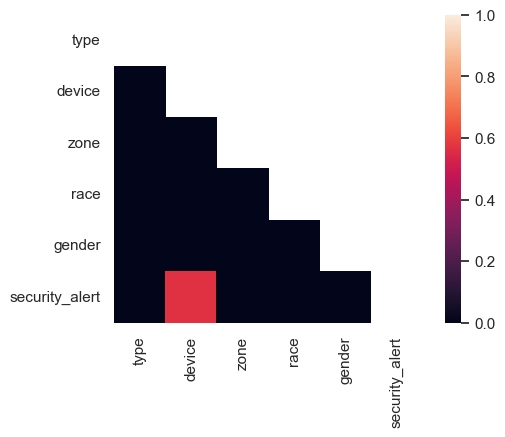

In [36]:
# Secondly, we plot a heatmap
mask = np.zeros_like(df_vcramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  fig, axx = plt.subplots(figsize=(6,4))
  ax = sns.heatmap(df_vcramer, mask = mask, vmin=0, vmax=1, square=True, ax=axx)

plt.show()

- We note that the variable 'device' has a certain correlation with the variable 'security alert'.

### We save our Data Frame in a new data set

In [37]:
path = '../data/processed/'
new_file = 'new_dataset_payments_fraud.parquet'

df.to_parquet(path+new_file)